In [1]:
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 36})
rc('text', usetex=True)

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import functools
import math
import numpy as np
from scipy.linalg import qr

plt.rcParams.update({'font.size': 45})


In [2]:
n=200
mu = 0.001

diag = np.random.rand(n)
diag = diag*(1-mu) + mu
D = np.diag(diag)


R = np.random.rand(n,n)

Q, _ = qr(R)

M = Q.dot(D).dot(Q.T)

def f(x):
    return x.T.dot(M).dot(x)/2.0
def L2(x):
    return np.sqrt(x.dot(x))

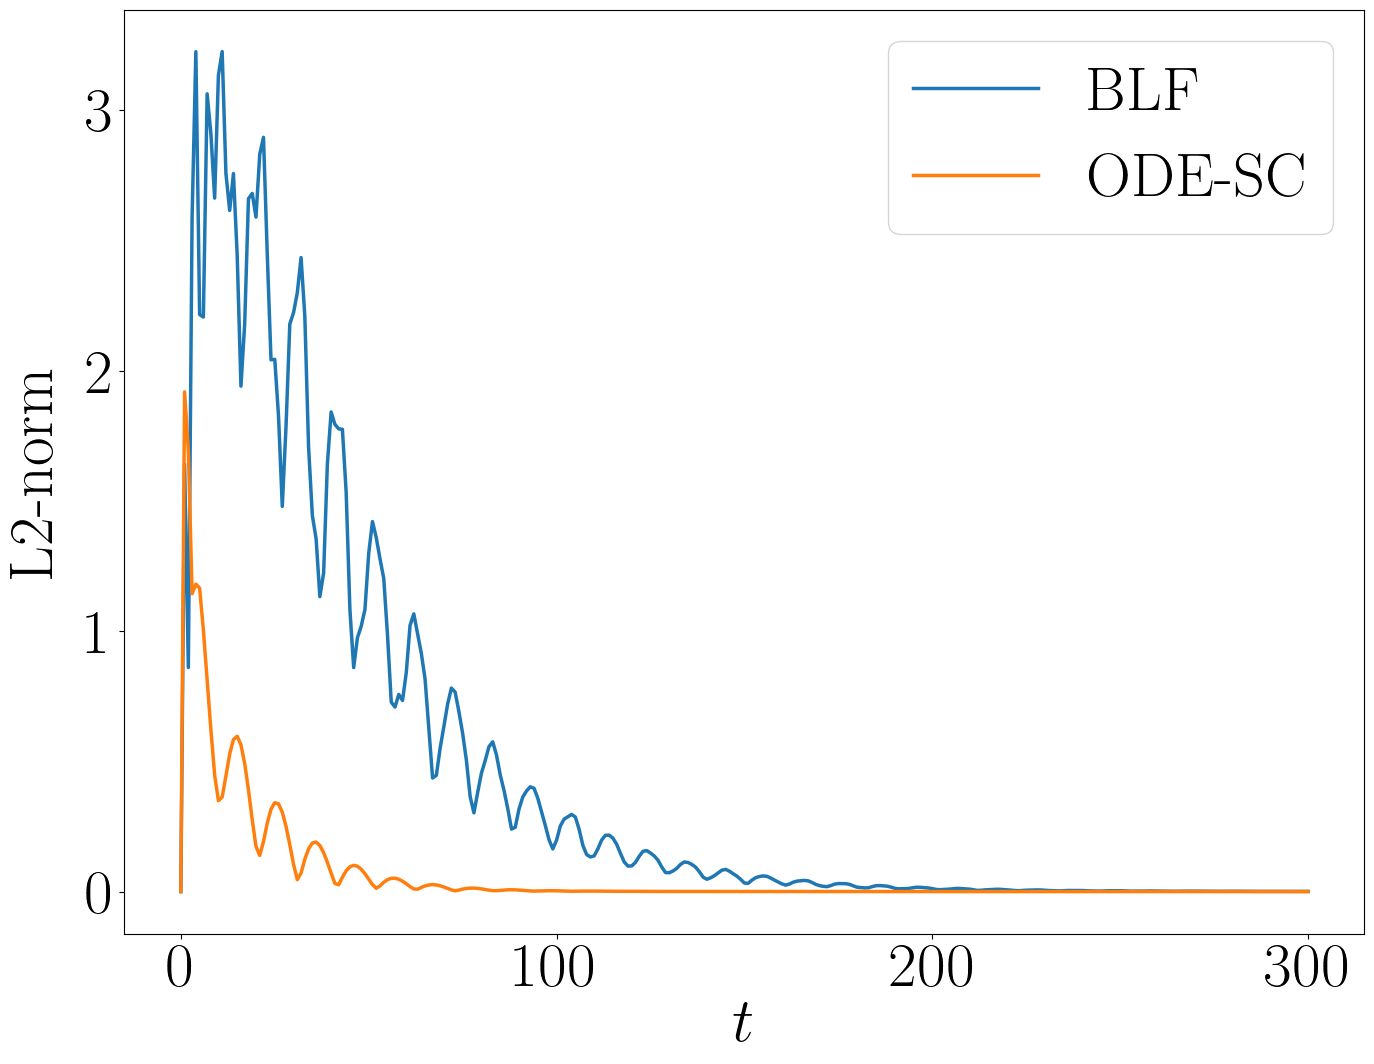

In [3]:
C=1
h = 1/C
time = int(300)
dpi=50

sqmu= math.sqrt(mu)
discrete_time = int(time*C)

A = math.exp(sqmu*h)
s = (1-1/A)*(1-1/A)/mu
a = (A-1)/(2*A-1)
b = 1/(2*A-1)
    

t = np.linspace(0, time, time+1)
t2 = np.linspace(0, time, time*100+1)
discrete_t = np.linspace(0, time, discrete_time+1)

start= np.random.rand(n)
start_grad = np.zeros(n)

p0 = np.concatenate((start,start_grad))

#Calculate Nesterov's method
def Nesterov(time):
    Nes = np.zeros((time+1,n))
    Nes[0] = start
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* b
        Nes[k+1] = y -  s * M.dot(y)
    return Nes

def BLF_SC(p,t):
    x = p[:n]
    dx = p[n:]
    ddx = -(2-a)*sqmu*dx-M.dot(x)
    dpdt = np.concatenate((dx,ddx))
    return dpdt

def ODE_SC(p,t):
    x = p[:n]
    dx = p[n:]
    ddx = -(2-a)*sqmu*dx-M.dot(x+a*dx/sqmu)
    dpdt = np.concatenate((dx,ddx))
    return dpdt

Nes = Nesterov(time=discrete_time)
sol = odeint(BLF_SC, p0, t2)
sol2 = odeint(ODE_SC, p0, t2)

solh = sol[:,:n][np.arange(0,len(sol[:,:n]),int(100/C))]
sol2h = sol2[:,:n][np.arange(0,len(sol2[:,:n]),int(100/C))]

L2_BLF_Nes = np.apply_along_axis(L2, 1, solh[:,:n]-Nes)
L2_ODE_Nes = np.apply_along_axis(L2, 1, sol2h[:,:n]-Nes)

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(discrete_t, L2_BLF_Nes[:], label='BLF', linewidth=2.5)
plt.plot(discrete_t, L2_ODE_Nes[:], label='ODE-SC', linewidth=2.5)

plt.xlabel('$t$', labelpad=0)
plt.ylabel('L2-norm', labelpad=15)
plt.legend()
plt.savefig('L2_BLF_ODE_SC_M_1.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

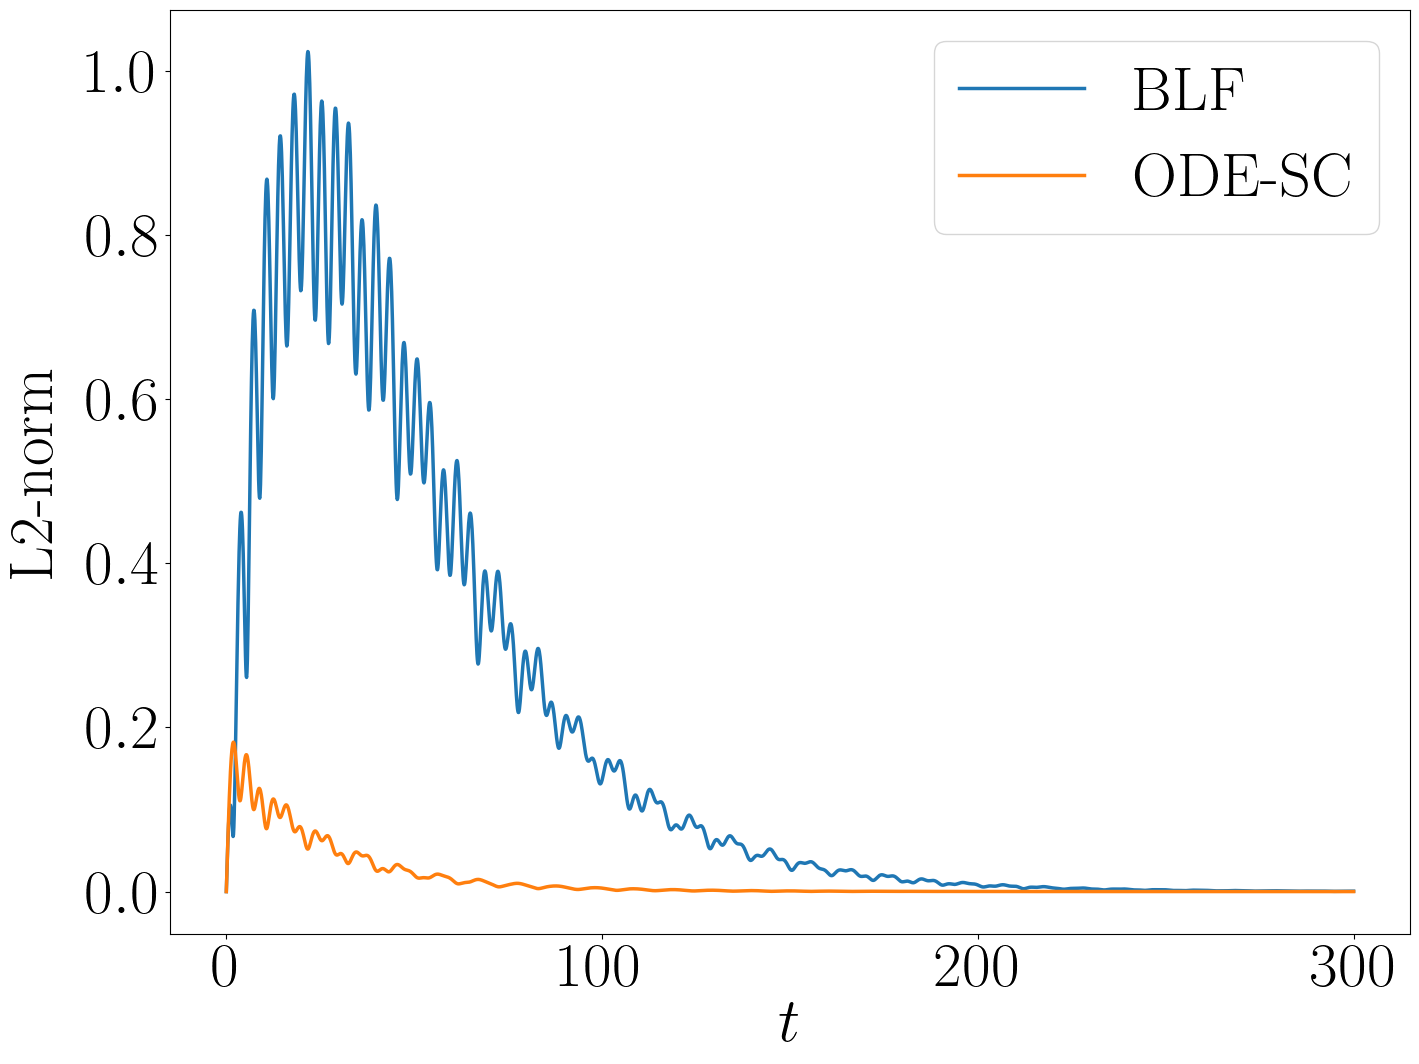

In [4]:
C=10
h = 1/C
time = int(300)
dpi=100

sqmu= math.sqrt(mu)
discrete_time = int(time*C)

A = math.exp(sqmu*h)
s = (1-1/A)*(1-1/A)/mu
a = (A-1)/(2*A-1)
b = 1/(2*A-1)
    

t = np.linspace(0, time, time+1)
t2 = np.linspace(0, time, time*100+1)
discrete_t = np.linspace(0, time, discrete_time+1)

start= np.random.rand(n)
start_grad = np.zeros(n)

p0 = np.concatenate((start,start_grad))

#Calculate Nesterov's method
def Nesterov(time):
    Nes = np.zeros((time+1,n))
    Nes[0] = start
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* b
        Nes[k+1] = y -  s * M.dot(y)
    return Nes

def BLF_SC(p,t):
    x = p[:n]
    dx = p[n:]
    ddx = -(2-a)*sqmu*dx-M.dot(x)
    dpdt = np.concatenate((dx,ddx))
    return dpdt

def ODE_SC(p,t):
    x = p[:n]
    dx = p[n:]
    ddx = -(2-a)*sqmu*dx-M.dot(x+a*dx/sqmu)
    dpdt = np.concatenate((dx,ddx))
    return dpdt

Nes = Nesterov(time=discrete_time)
sol = odeint(BLF_SC, p0, t2)
sol2 = odeint(ODE_SC, p0, t2)

solh = sol[:,:n][np.arange(0,len(sol[:,:n]),int(100/C))]
sol2h = sol2[:,:n][np.arange(0,len(sol2[:,:n]),int(100/C))]

L2_BLF_Nes = np.apply_along_axis(L2, 1, solh[:,:n]-Nes)
L2_ODE_Nes = np.apply_along_axis(L2, 1, sol2h[:,:n]-Nes)

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(discrete_t, L2_BLF_Nes[:], label='BLF', linewidth=2.5)
plt.plot(discrete_t, L2_ODE_Nes[:], label='ODE-SC', linewidth=2.5)

plt.xlabel('$t$', labelpad=0)
plt.ylabel('L2-norm', labelpad=15)
plt.legend()
plt.savefig('L2_BLF_ODE_SC_M_2.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()

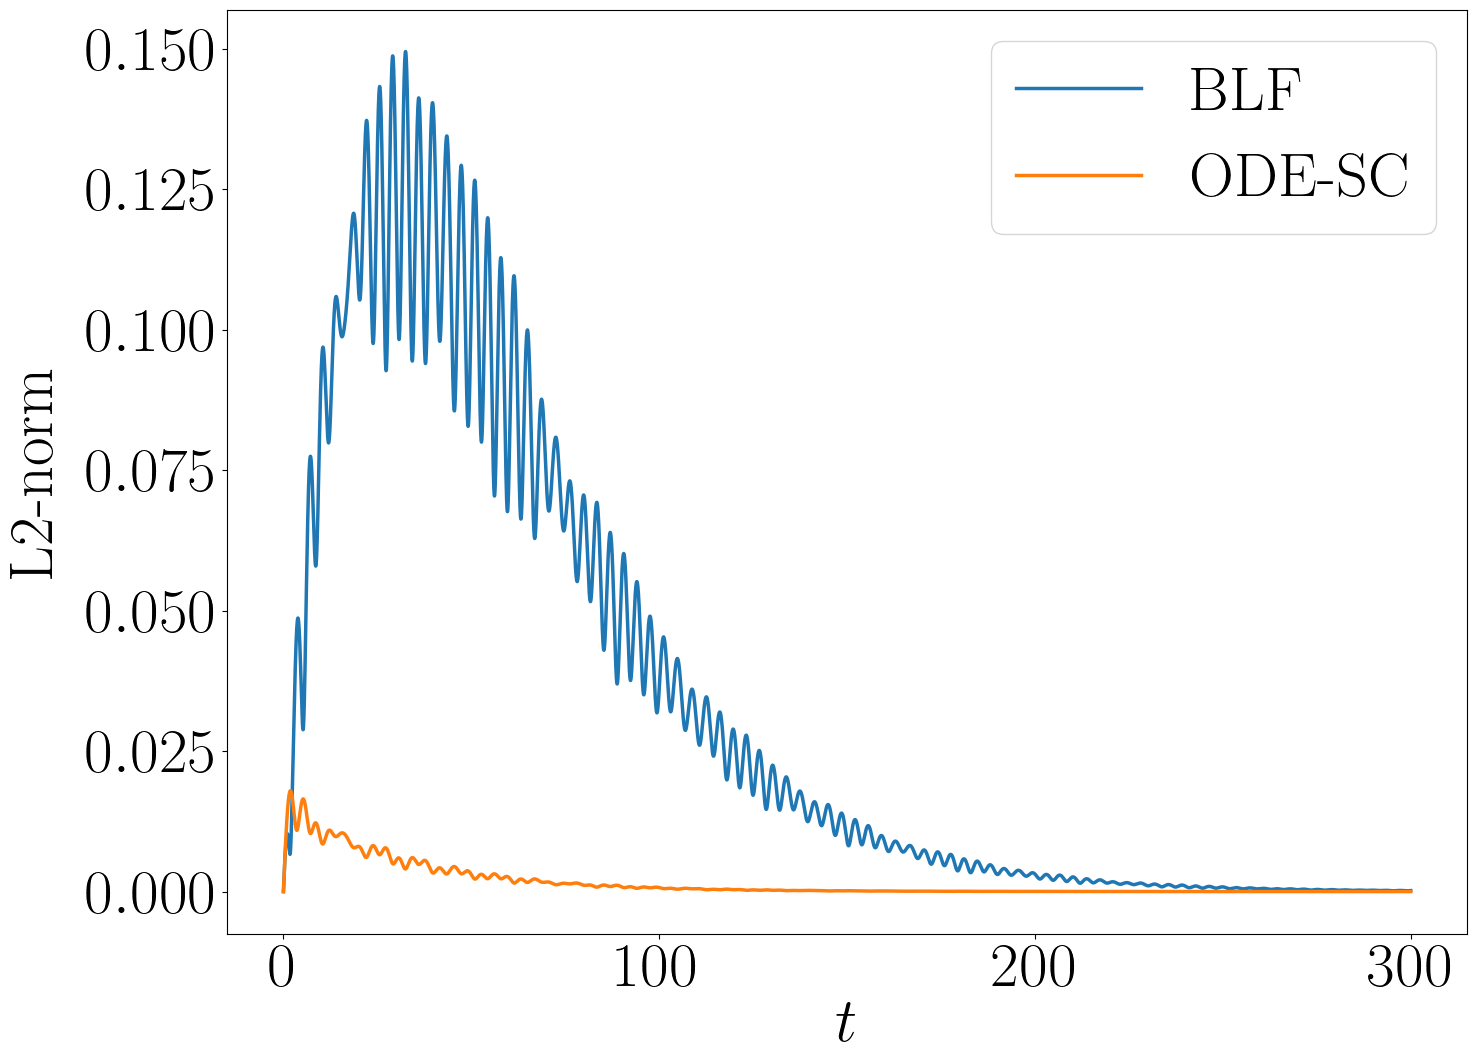

In [5]:
C=100
h = 1/C
time = int(300)
dpi=100

sqmu= math.sqrt(mu)
discrete_time = int(time*C)

A = math.exp(sqmu*h)
s = (1-1/A)*(1-1/A)/mu
a = (A-1)/(2*A-1)
b = 1/(2*A-1)
    

t = np.linspace(0, time, time+1)
t2 = np.linspace(0, time, time*100+1)
discrete_t = np.linspace(0, time, discrete_time+1)

start= np.random.rand(n)
start_grad = np.zeros(n)

p0 = np.concatenate((start,start_grad))

#Calculate Nesterov's method
def Nesterov(time):
    Nes = np.zeros((time+1,n))
    Nes[0] = start
    for k in range(time):
        if k==0:
            y = Nes[k]
        else:
            y = Nes[k] + (Nes[k]-Nes[k-1])* b
        Nes[k+1] = y -  s * M.dot(y)
    return Nes

def BLF_SC(p,t):
    x = p[:n]
    dx = p[n:]
    ddx = -(2-a)*sqmu*dx-M.dot(x)
    dpdt = np.concatenate((dx,ddx))
    return dpdt

def ODE_SC(p,t):
    x = p[:n]
    dx = p[n:]
    ddx = -(2-a)*sqmu*dx-M.dot(x+a*dx/sqmu)
    dpdt = np.concatenate((dx,ddx))
    return dpdt

Nes = Nesterov(time=discrete_time)
sol = odeint(BLF_SC, p0, t2)
sol2 = odeint(ODE_SC, p0, t2)

solh = sol[:,:n][np.arange(0,len(sol[:,:n]),int(100/C))]
sol2h = sol2[:,:n][np.arange(0,len(sol2[:,:n]),int(100/C))]

L2_BLF_Nes = np.apply_along_axis(L2, 1, solh[:,:n]-Nes)
L2_ODE_Nes = np.apply_along_axis(L2, 1, sol2h[:,:n]-Nes)

plt.rcParams.update({'font.size': 45})
plt.figure(figsize=(16,12))
plt.plot(discrete_t, L2_BLF_Nes[:], label='BLF', linewidth=2.5)
plt.plot(discrete_t, L2_ODE_Nes[:], label='ODE-SC', linewidth=2.5)

plt.xlabel('$t$', labelpad=0)
plt.ylabel('L2-norm', labelpad=15)
plt.legend()
plt.savefig('L2_BLF_ODE_SC_M_3.png', dpi=dpi, bbox_inches = 'tight', pad_inches = 0)
plt.show()